In [11]:
# Importing Required Libraries
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline 

TypeError: ignored

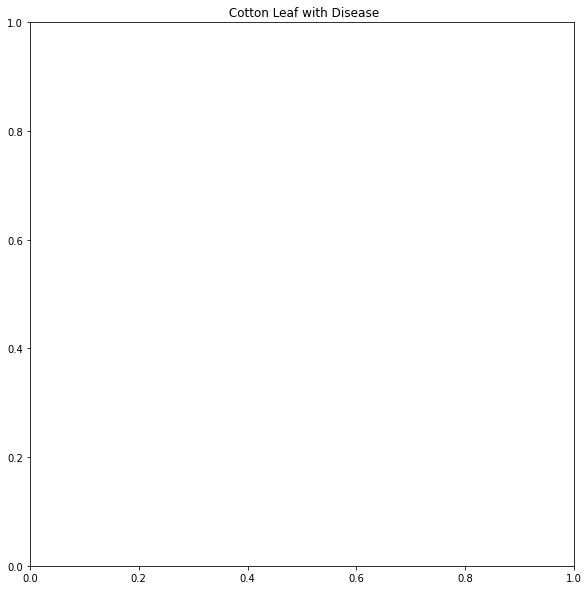

In [12]:
image = cv2.imread('C:/Users/vikra/Documents/Internship work/dataset virgin/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

In [ ]:
image = cv2.imread('C:/Users/vikra/Documents/Internship work/dataset virgin/Cotton Disease/train/diseased cotton plant/dd (104)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Plant with Disease')
plt.imshow(image)

In [ ]:
image = cv2.imread('C:/Users/vikra/Documents/Internship work/dataset virgin/Cotton Disease/train/fresh cotton leaf/d (100)_iaip.jpg')
type(image)
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Leaf')
plt.imshow(image)

In [ ]:
image = cv2.imread('C:/Users/vikra/Documents/Internship work/dataset virgin/Cotton Disease/train/fresh cotton plant/dsd (143)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Plant')
plt.imshow(image)

In [13]:
!pwd

/content


In [14]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)
train_data = train_datagenerator.flow_from_directory('C:/Users/vikra/Documents/Internship work/dataset virgin/Cotton Disease/train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('C:/Users/vikra/Documents/Internship work/dataset virgin/Cotton Disease/val',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

FileNotFoundError: ignored

In [ ]:
# CNN Model
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
# Compiling the CNN
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_set = test_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
# Fit the model
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()